Importing Dependencies

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [24]:
# loading the data from csv file toa Pandas Dataframe
insurance_data = pd.read_csv('insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
# first 5 rows of data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# number of rows & columns
insurance_data.shape

(1338, 7)

In [27]:
# getting the information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Columns : sex, smoker, region

In [28]:
# checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
# statistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\hp\AppData\Local\Temp\ipykernel_8\2785558561.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


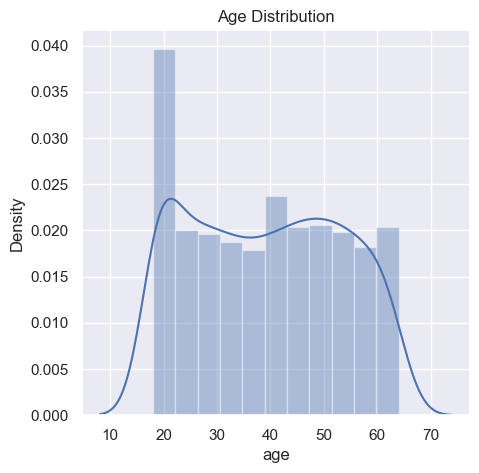

In [30]:
# distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

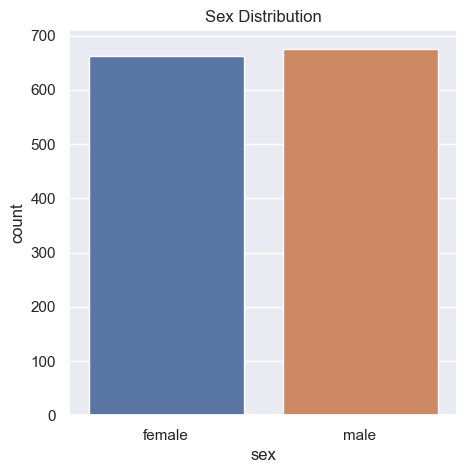

In [31]:
# Sex Distribution
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_data, hue=insurance_data['sex'])
plt.title('Sex Distribution')
plt.show()

In [32]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_8\3566121275.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


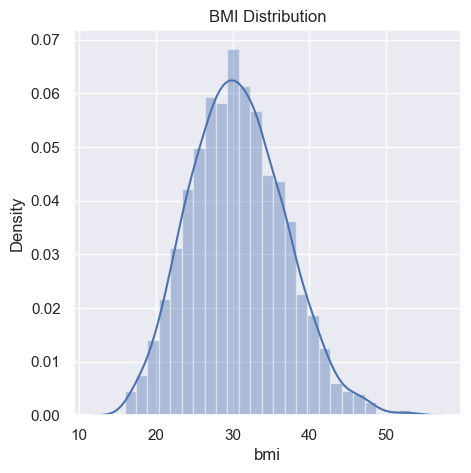

In [33]:
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range => 18.5 to 24.9
Under Weight : <18.5
Over Weight: > 24.9

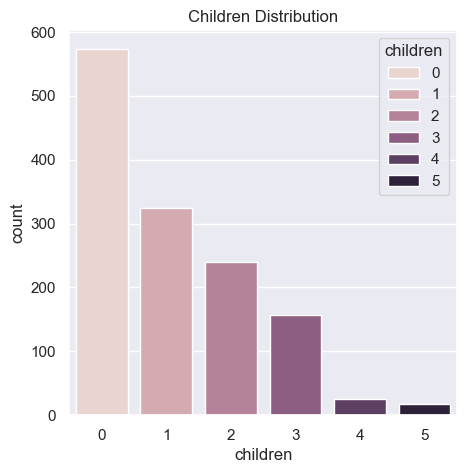

In [34]:
# Children Column
plt.figure(figsize=(5,5))
sns.countplot(x ='children' ,data= insurance_data, hue=insurance_data['children'])
plt.title('Children Distribution')
plt.show()

In [35]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

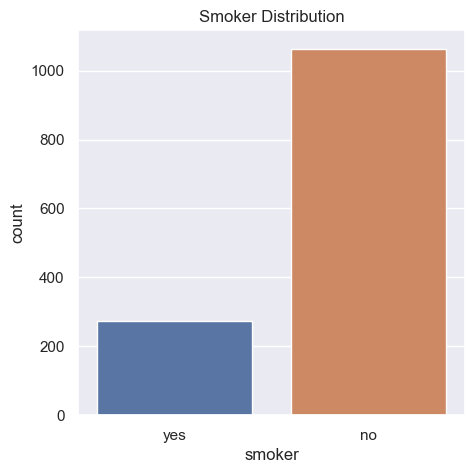

In [36]:
# Smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_data, hue = insurance_data['smoker'])
plt.title('Smoker Distribution')
plt.show()

In [37]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

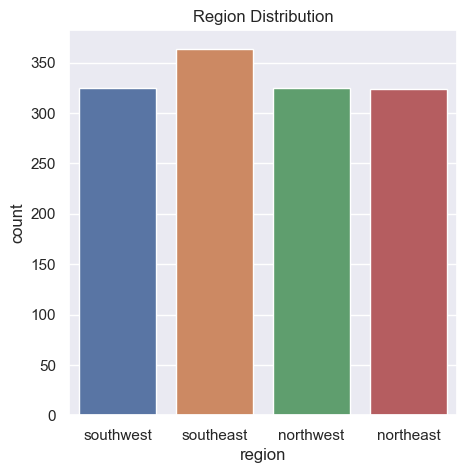

In [38]:
# region column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_data, hue=insurance_data['region'])
plt.title('Region Distribution')
plt.show()

In [39]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_8\3277259204.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


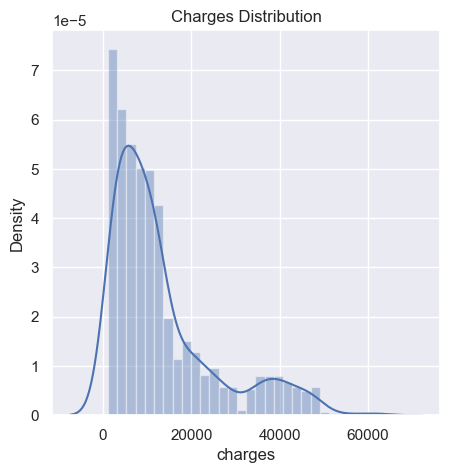

In [40]:
# charge column
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Preprocessing

In [41]:
# encoding sex column
insurance_data.replace({'sex': {'male':0, 'female': 1}}, inplace=True)

# encoding 'smoker' column
insurance_data.replace({'smoker':{'yes':1, 'no': 0}}, inplace = True)

# encoding 'region' columm
insurance_data.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8\3470453845.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex': {'male':0, 'female': 1}}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8\3470453845.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':1, 'no': 0}}, inplace = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8\3470453845.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

In [42]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Splitting the features and target

In [48]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [49]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [50]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the training and testing data

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Linear Regression

In [66]:
# loading the linear regression model
reg = LinearRegression()

In [67]:
reg.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [68]:
# prediction on training data
training_data_prediction = reg.predict(X_train)

In [69]:
# squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value = ', r2_train)

R squared value =  0.751505643411174


In [70]:
# prediction on test data
test_data_prediction = reg.predict(X_test)

In [71]:
# squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value = ', r2_test)

R squared value =  0.7447273869684076


Building a Prediction System

In [73]:
input_data = (31,1,25.74,0,0,0)

# chaning input_data to numpy array
input_data_as_array = np.array(input_data)

#reshape the array
input_data_reshaped =  input_data_as_array.reshape(1, -1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD = ', prediction[0])

[3760.0805765]
The insurance cost is USD =  3760.080576496044


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
